In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import glob
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

In [3]:
#Creating the Training dataframe
path = r'/home/harindu/Assignment_II/accel_data_1' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)

activityDF = pd.concat(li, axis=0, ignore_index=True)

In [4]:
#Creating the Testing dataframe
path = r'/home/harindu/Assignment_II/accel_data_test' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)

activityDF_Test = pd.concat(li, axis=0, ignore_index=True)

In [5]:
activityDF_Test.columns = ['index', 'xAccel', 'yAccel', 'zAccel', 'activity']
activityDF_Test = activityDF_Test.drop(['index'], axis=1)

In [6]:
activityDF_Test = activityDF_Test.drop(activityDF_Test[activityDF_Test.activity == 0].index)

In [7]:
activityDF.columns = ['index', 'xAccel', 'yAccel', 'zAccel', 'activity']

In [8]:
activityDF

,index,xAccel,yAccel,zAccel,activity
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1
...,...,...,...,...,...
1431437,140900.0,2098,2305,1982,7
1431438,140900.0,2106,2314,1980,7
1431439,140900.0,2112,2319,1973,7
1431440,140900.0,2111,2319,1969,7


In [9]:
activityDF = activityDF.drop(['index'], axis=1)

In [10]:
activityDF.shape

(1431442, 4)

In [11]:
#Comparing the data types
activityDF.dtypes

xAccel      int64
yAccel      int64
zAccel      int64
activity    int64
dtype: object

In [12]:
activityDF['activity'].value_counts()

1    469437
7    436951
4    268320
3    150927
5     37338
2     35703
6     29320
0      3446
Name: activity, dtype: int64

In [13]:
activityDF = activityDF.drop(activityDF[activityDF.activity == 0].index)

In [14]:
activityDF['activity'].value_counts()

1    469437
7    436951
4    268320
3    150927
5     37338
2     35703
6     29320
Name: activity, dtype: int64

In [15]:
activityDF.shape

(1427996, 4)

In [16]:
activityDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1427996 entries, 0 to 1431440
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   xAccel    1427996 non-null  int64
 1   yAccel    1427996 non-null  int64
 2   zAccel    1427996 non-null  int64
 3   activity  1427996 non-null  int64
dtypes: int64(4)
memory usage: 54.5 MB


In [17]:
pd.options.display.float_format = '{:,.10f}'.format
activityDF.describe()

,xAccel,yAccel,zAccel,activity
count,"1,427,996.0000000000","1,427,996.0000000000","1,427,996.0000000000","1,427,996.0000000000"
mean,"1,959.8665878616","2,379.6311999473","1,989.5479637198",3.8432677683
std,108.4654587558,101.5129892019,85.7307301386,2.4498899962
min,282.0000000000,146.0000000000,1.0000000000,1.0000000000
25%,"1,885.0000000000","2,337.0000000000","1,952.0000000000",1.0000000000
50%,"1,951.0000000000","2,363.0000000000","2,001.0000000000",4.0000000000
75%,"2,063.0000000000","2,395.0000000000","2,041.0000000000",7.0000000000
max,"3,828.0000000000","3,997.0000000000","4,095.0000000000",7.0000000000


In [18]:
activityDF.notnull().sum()

xAccel      1427996
yAccel      1427996
zAccel      1427996
activity    1427996
dtype: int64

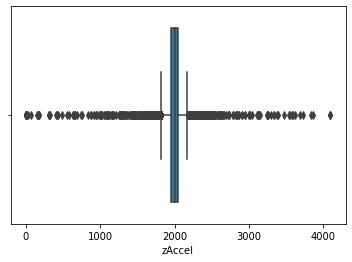

In [19]:
sns.boxplot(x=activityDF['zAccel'])

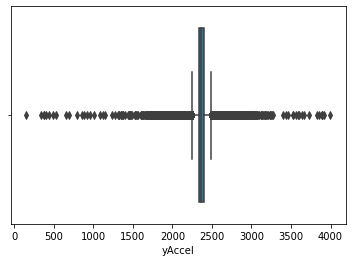

In [20]:
sns.boxplot(x=activityDF['yAccel'])

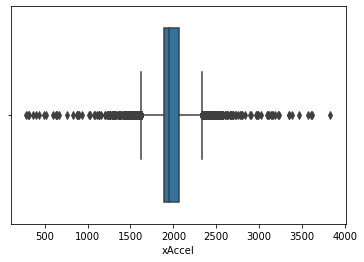

In [21]:
sns.boxplot(x=activityDF['xAccel'])

<Figure size 432x288 with 0 Axes>

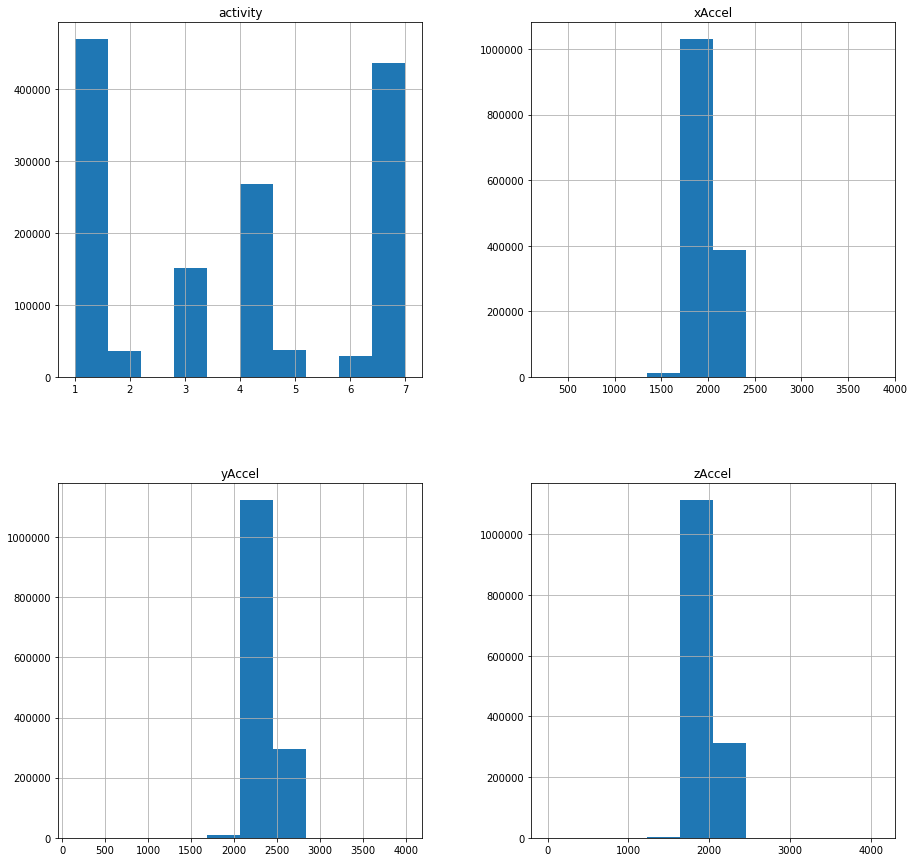

In [22]:
plt.figure()
activityDF.hist(figsize=(15,15))
plt.show()

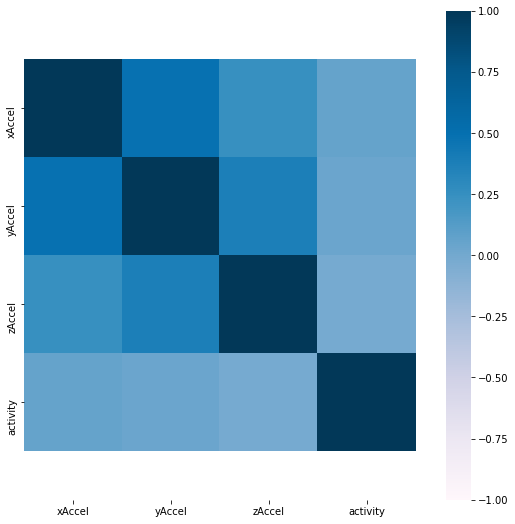

In [23]:
correlations = activityDF.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, cmap="PuBu", center=0, vmin=-1, vmax=1, square=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [25]:
activityDF['activity'].value_counts()

1    469437
7    436951
4    268320
3    150927
5     37338
2     35703
6     29320
Name: activity, dtype: int64

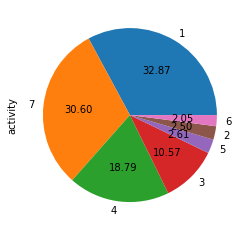

In [26]:
#Gender distribution in the dataset

activityDF['activity'].value_counts().plot(kind='pie',autopct='%.2f')

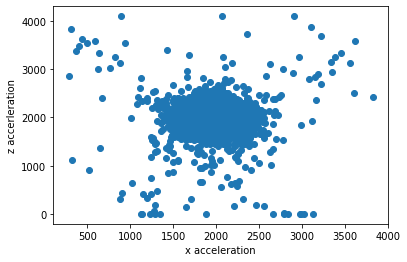

In [27]:
plt.scatter(activityDF['xAccel'],activityDF['zAccel'])
plt.xlabel('x acceleration')
plt.ylabel('z accerleration')
plt.show()

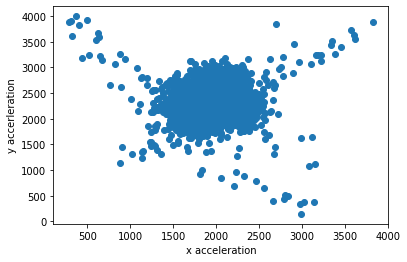

In [28]:
plt.scatter(activityDF['xAccel'],activityDF['yAccel'])
plt.xlabel('x acceleration')
plt.ylabel('y accerleration')
plt.show()

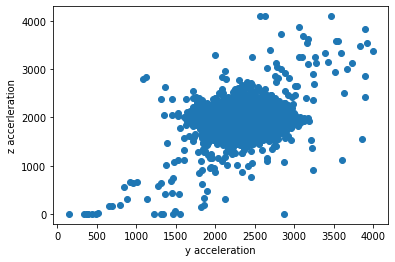

In [29]:
plt.scatter(activityDF['yAccel'],activityDF['zAccel'])
plt.xlabel('y acceleration')
plt.ylabel('z accerleration')
plt.show()

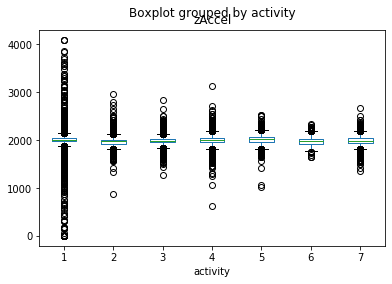

In [30]:
activityDF.boxplot(by ='activity', column =['zAccel'], grid = False) 

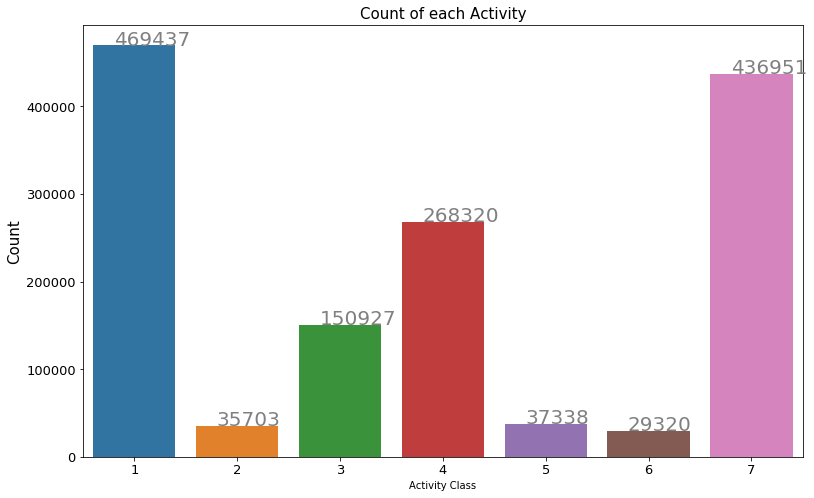

In [31]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Activity", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "activity", data = activityDF)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("Activity Class")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 0)
plt.show()

In [32]:
#Shuffling the dataframe

activityDF = activityDF.sample(frac=1).reset_index(drop=True)

In [33]:
#Robust Scaler for features

from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
activityDF[['xAccel', 'yAccel', 'zAccel']] = robust.fit_transform(activityDF[['xAccel', 'yAccel', 'zAccel']])

In [61]:
#MinMax Scaler for features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
activityDF[['xAccel', 'yAccel', 'zAccel']] = scaler.fit_transform(activityDF[['xAccel', 'yAccel', 'zAccel']])

In [34]:
#Dividing the features and the class variable in to 2 dataframes

X = activityDF[['xAccel', 'yAccel', 'zAccel']]
Y = activityDF[['activity']]

In [35]:
#Importing train, test split from the Sklearn in order to split the data in to training data and testing data

from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(np.array(X), np.array(Y), test_size=0.2)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(1142396, 3)
(285600, 3)
(1142396, 1)
(285600, 1)


In [42]:
def displayValidations(Y_Test, Predictions):
    
    labels = [" Working-at-Computer", "Standing-Walking-Going-updown", "Standing", "Walking", "Going-UpDown-Stairs", "Walking-Talking",
             "Talking-while-Standing"]
    confusionMatx = confusion_matrix(Y_Test, Predictions)
    precision = confusionMatx/confusionMatx.sum(axis = 0)
    recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    sns.set(font_scale=1)
    
    #Confusion Matrix
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "BuGn_r", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 20)
    plt.xlabel('Predicted Class', fontsize = 10)
    plt.ylabel('Original Class', fontsize = 10)
    plt.tick_params(labelsize = 10)
    plt.xticks(rotation = 90)
    plt.show()
    
    #Precission Map
    plt.figure(figsize=(16,7))
    sns.heatmap(precision, cmap = "BuGn_r", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Precision Matrix", fontsize = 20)
    plt.xlabel('Predicted Class', fontsize = 10)
    plt.ylabel('Original Class', fontsize = 10)
    plt.tick_params(labelsize = 10)
    plt.xticks(rotation = 90)
    plt.show()
    
    #Recall Map
    plt.figure(figsize=(16,7))
    sns.heatmap(recall, cmap = "BuGn_r", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Recall Matrix", fontsize = 20)
    plt.xlabel('Predicted Class', fontsize = 10)
    plt.ylabel('Original Class', fontsize = 10)
    plt.tick_params(labelsize = 10)
    plt.xticks(rotation = 90)
    plt.show()

In [43]:

def trainModel(cross_val, x_train, y_train, x_test, y_test, model_name):

    cross_val.fit(x_train, y_train)
    predicted_points = cross_val.predict(x_test)
    accuracy = np.round(accuracy_score(y_test, predicted_points)*100, 2)
    
    print('Accuracy: ' + str(accuracy)+"%\n")
    
    print(' Best Estimator  ')
    print("{}\n".format(cross_val.best_estimator_))
    
    print(' Best Hyper-Parameters  ')
    print(cross_val.best_params_)
    
    displayValidations(y_test, predicted_points)

Accuracy: 71.62%

 Best Estimator  
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 Best Hyper-Parameters  
{'max_depth': 9}


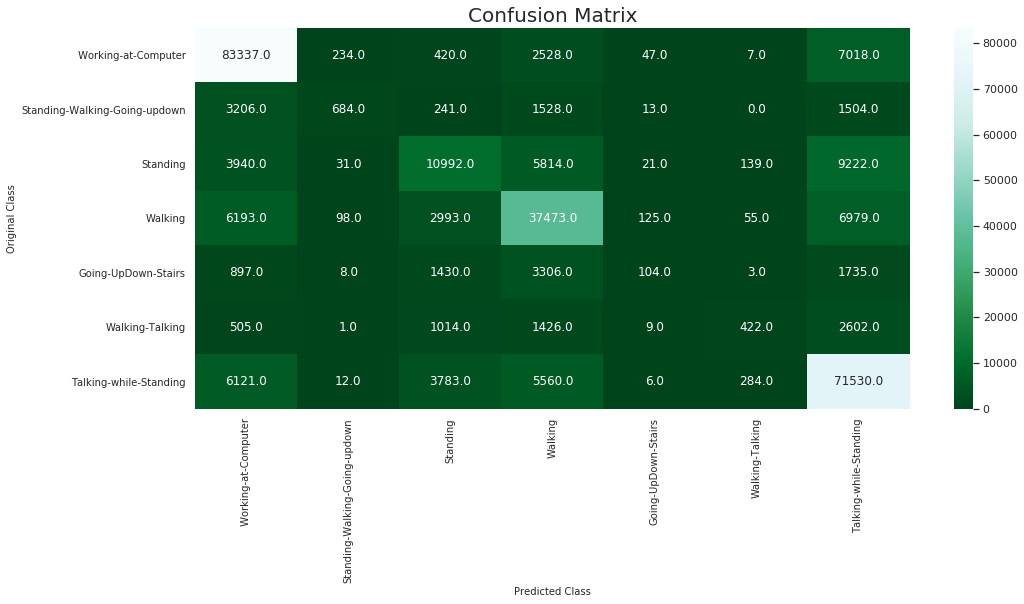

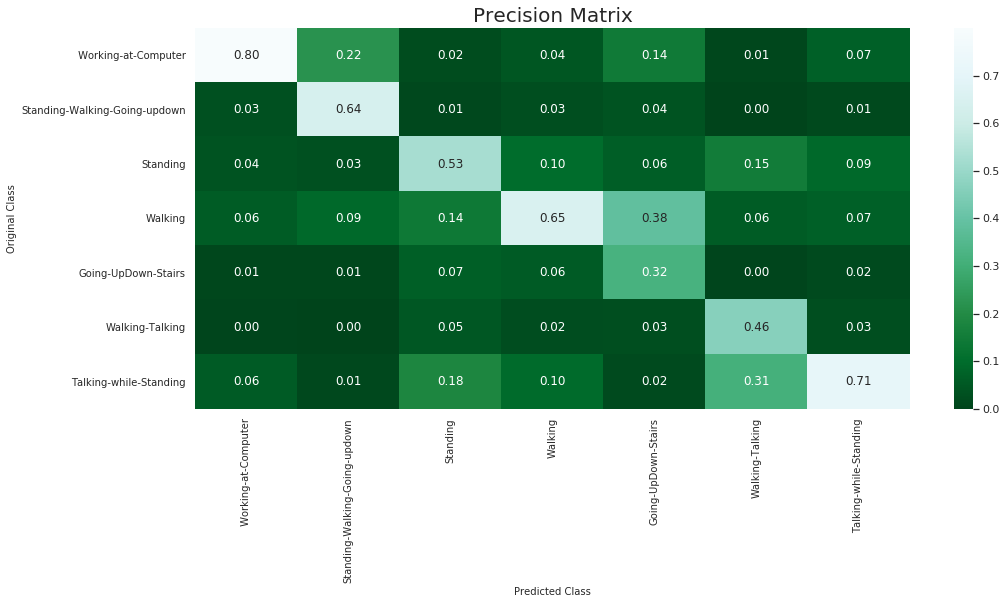

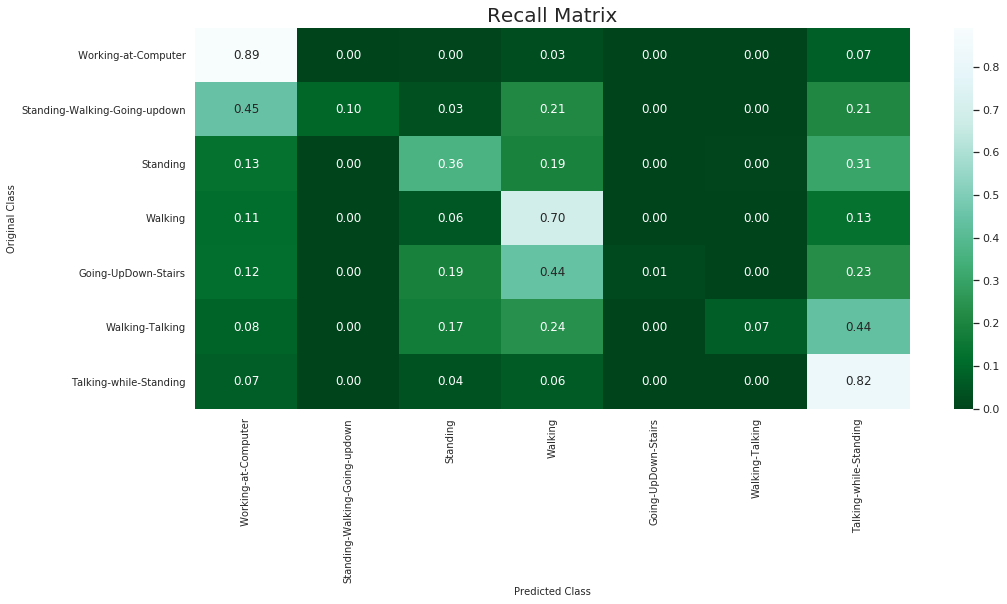

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9]}
classifier = DecisionTreeClassifier()
cross_val = GridSearchCV(classifier, parameters, cv=3)
trainModel(cross_val, trainX, trainY, testX, testY, "Decision Tree")

In [66]:
from sklearn.neighbors import KNeighborsClassifier

Kclf = KNeighborsClassifier(7)
fit = Kclf.fit(trainX, trainY)
y_pre = fit.predict(testX)
y_pre

/home/harindu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


array([7, 1, 7, ..., 4, 2, 1])

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testY, y_pre)
print(cm)

[[85069   639  1085  2991   111    30  4068]
 [ 2657  1535   431  1474    35     8   979]
 [ 2130   278 13833  6330   579   338  6778]
 [ 4554   470  3866 38780   440   155  5258]
 [  734    43  1374  3109   815    66  1352]
 [  361    27   857  1481   182   885  2004]
 [ 4595   389  4959  6151   339   717 70259]]


In [68]:
from sklearn.metrics import classification_report
print(classification_report(testY,y_pre))


              precision    recall  f1-score   support

           1       0.85      0.91      0.88     93993
           2       0.45      0.22      0.29      7119
           3       0.52      0.46      0.49     30266
           4       0.64      0.72      0.68     53523
           5       0.33      0.11      0.16      7493
           6       0.40      0.15      0.22      5797
           7       0.77      0.80      0.79     87409

    accuracy                           0.74    285600
   macro avg       0.57      0.48      0.50    285600
weighted avg       0.72      0.74      0.73    285600



In [69]:
from sklearn.neighbors import KNeighborsClassifier
K2clf = KNeighborsClassifier(7, weights='distance')
fit = K2clf.fit(trainX, trainY)


/home/harindu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
K2y_pre = fit.predict(testX)
cm = confusion_matrix(testY, K2y_pre)
print(classification_report(testY,K2y_pre))


              precision    recall  f1-score   support

           1       0.85      0.89      0.87     93993
           2       0.40      0.22      0.28      7119
           3       0.50      0.43      0.46     30266
           4       0.63      0.71      0.67     53523
           5       0.25      0.12      0.16      7493
           6       0.31      0.16      0.21      5797
           7       0.76      0.78      0.77     87409

    accuracy                           0.72    285600
   macro avg       0.53      0.47      0.49    285600
weighted avg       0.71      0.72      0.71    285600



In [62]:
clfAccel = DecisionTreeClassifier(criterion="entropy")
clfAccel = clfAccel.fit(trainX, trainY)


In [63]:
from sklearn import metrics
predictions = clfAccel.predict(testX)
print(metrics.classification_report(testY, predictions))

              precision    recall  f1-score   support

           1       0.83      0.85      0.84     93993
           2       0.24      0.22      0.23      7119
           3       0.40      0.43      0.42     30266
           4       0.58      0.57      0.57     53523
           5       0.15      0.15      0.15      7493
           6       0.18      0.19      0.18      5797
           7       0.74      0.72      0.73     87409

    accuracy                           0.66    285600
   macro avg       0.45      0.45      0.45    285600
weighted avg       0.67      0.66      0.66    285600



In [65]:
from sklearn import tree

# trainXA = pd.get_dummies(trainX)
from sklearn import tree
dot_data = tree.export_graphviz(clfAccel, out_file=None,
                                feature_names=X,
                                class_names=Y,
                                filled=True,
                                rounded=False,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph


ValueError: Length of feature_names, 1427996 does not match number of features, 3